Comenzamos con la importación de las librerías necesarias:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline
sns.set_theme()

# Conjunto de datos
El conjunto de datos objeto de estudio contiene 6 variables de las cuales tomaremos 5 como varibles de entrada y una (el SOC) como variable de salida o variable dependiente. El objetivo por tanto será la creación de un modelo de regresión del SOC a partir de los datos de entrada.

## Carga de datos desde archivo
Los datos se presentan como un único archivo csv separado por comas. Nos quedamos únicamente los datos de carga.

In [ ]:
df = pd.read_excel('dataset.xlsx')
df = df[df["State"] == 3]
df.head()

,I,V,State,T1,T2,SOC
121,-32.024857,3.288624,3,39.28403,38.03678,99.878390
122,-31.997208,3.273671,3,39.24842,37.98933,99.756886
123,-31.997208,3.266041,3,39.24842,37.98933,99.635381
124,-31.997208,3.260853,3,39.23654,38.00119,99.513877
125,-31.999512,3.256580,3,39.22467,37.98933,99.392362


## Información general del conjunto de datos
El subconjunto de descarga contiene un total de 7451 observaciones.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7451 entries, 121 to 16126
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   I       7451 non-null   float64
 1   V       7451 non-null   float64
 2   State   7451 non-null   int64  
 3   T1      7451 non-null   float64
 4   T2      7451 non-null   float64
 5   SOC     7451 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 407.5 KB


## Medidas de tendencia central y variabilidad

In [ ]:
df.describe()

,I,V,State,T1,T2,SOC
count,7451.000000,7451.000000,7451.0,7451.000000,7451.000000,7451.000000
mean,-31.998402,3.093252,3.0,38.744850,37.468374,49.939538
std,0.002128,0.178293,0.0,0.685353,0.651236,28.869400
min,-32.043290,1.999847,3.0,37.431740,36.150660,0.000000
25%,-31.999512,3.077897,3.0,38.156040,36.897990,24.954610
50%,-31.999512,3.144579,3.0,38.642860,37.360620,49.939396
75%,-31.997208,3.179370,3.0,39.248420,37.941880,74.924507
max,-31.992599,3.290455,3.0,40.970100,39.673790,99.879355


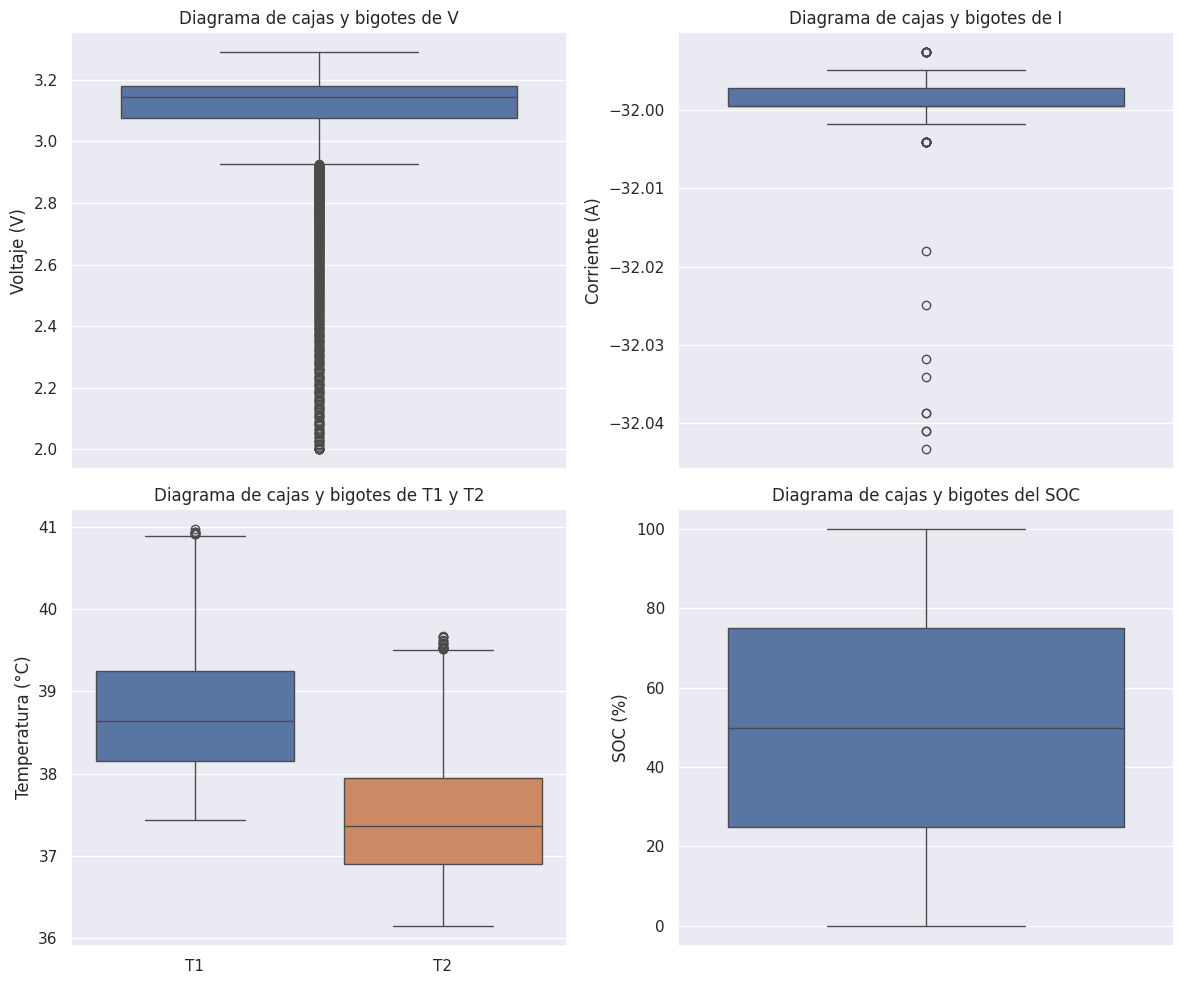

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(ax=axes[0, 0], y=df['V'])
axes[0, 0].set_ylabel("Voltaje (V)")
axes[0, 0].set_title('Diagrama de cajas y bigotes de V')

sns.boxplot(ax=axes[0, 1], y=df['I'])
axes[0, 1].set_ylabel("Corriente (A)")
axes[0, 1].set_title('Diagrama de cajas y bigotes de I')

sns.boxplot(ax=axes[1, 0], data=df[['T1', 'T2']])
axes[1, 0].set_ylabel("Temperatura (°C)")
axes[1, 0].set_title('Diagrama de cajas y bigotes de T1 y T2')

sns.boxplot(ax=axes[1, 1], y=df['SOC'])
axes[1, 1].set_ylabel("SOC (%)")
axes[1, 1].set_title('Diagrama de cajas y bigotes del SOC')

plt.tight_layout()
plt.show()

# Visualización de los datos

##Análisis de una variable

###Corriente

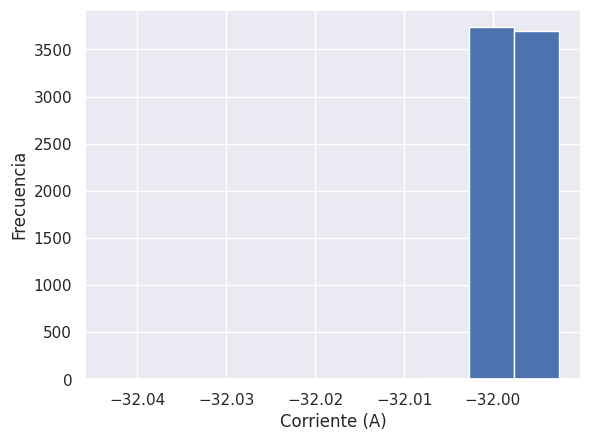

In [ ]:
plt.hist(df["I"])
plt.xlabel("Corriente (A)")
plt.ylabel("Frecuencia")
plt.show()

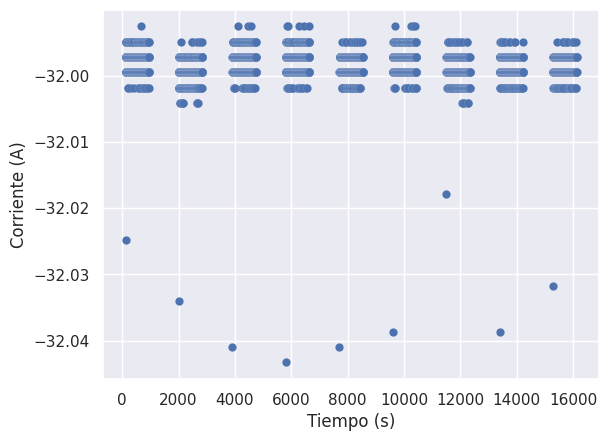

In [ ]:
sns.scatterplot(x=df.index, y=df["I"], linewidth=0.05)
plt.xlabel("Tiempo (s)")
plt.ylabel("Corriente (A)")
plt.show()

###Tensión

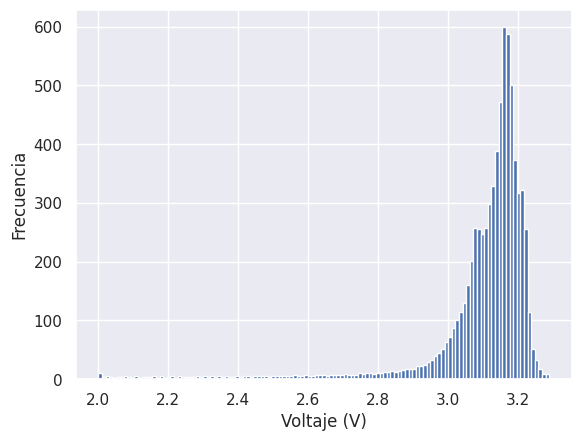

In [ ]:
plt.hist(df["V"], bins="auto")
plt.xlabel("Voltaje (V)")
plt.ylabel("Frecuencia")
plt.show()

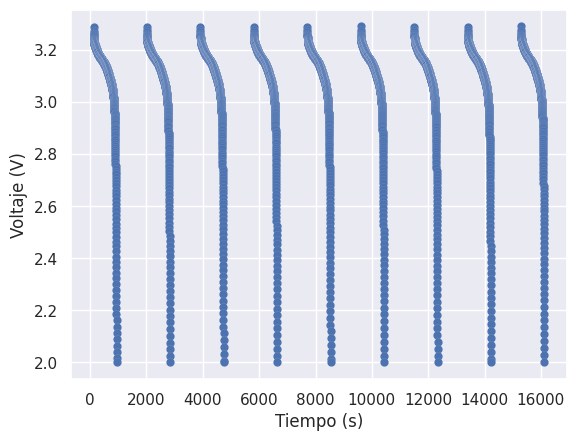

In [ ]:
sns.scatterplot(x=df.index, y=df["V"], linewidth=0.05)
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (V)")
plt.show()

###Temperatura

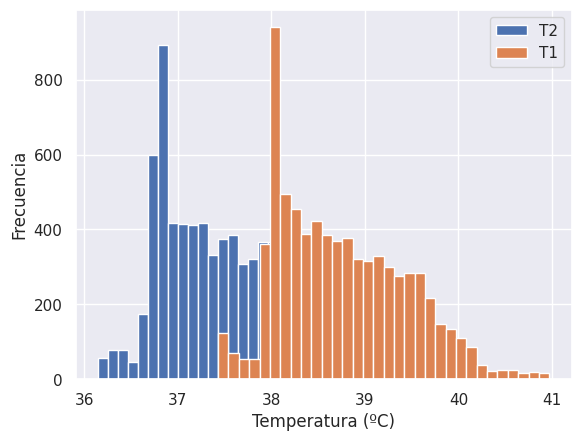

In [ ]:
plt.hist(df["T2"], bins="auto")
plt.hist(df["T1"], bins="auto")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Frecuencia")
plt.legend(["T2", "T1"])
plt.show()

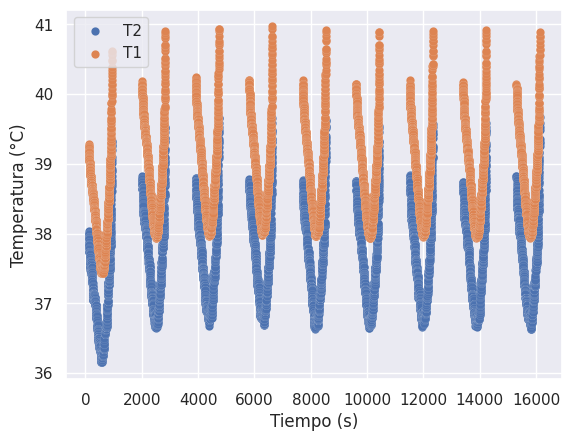

In [ ]:
sns.scatterplot(x=df.index, y=df["T2"], linewidth=0.05, label="T2")
sns.scatterplot(x=df.index, y=df["T1"], linewidth=0.05, label="T1")
plt.xlabel("Tiempo (s)")
plt.ylabel("Temperatura (°C)")
plt.legend()
plt.show()

###Estado

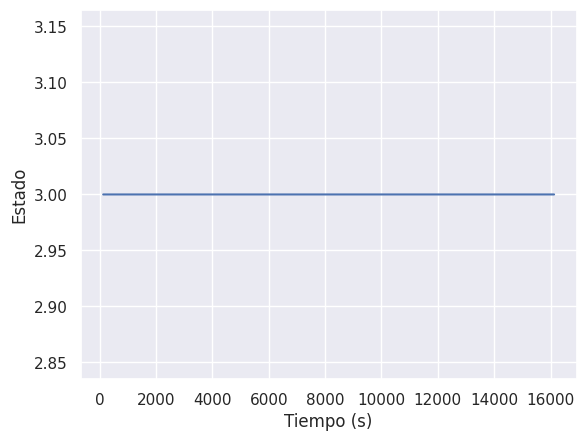

In [ ]:
plt.plot(df["State"])
plt.xlabel("Tiempo (s)")
plt.ylabel("Estado")
plt.show()

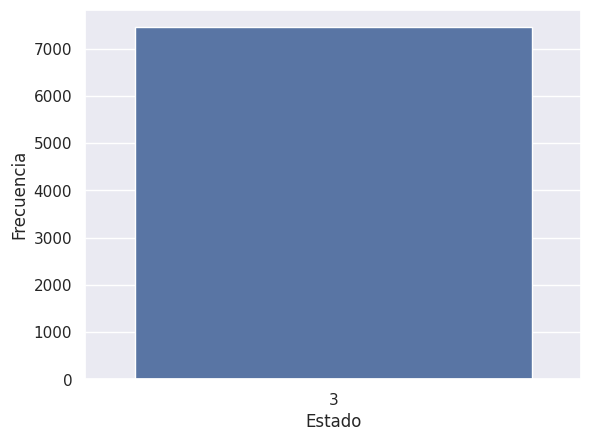

In [ ]:
ax = sns.countplot(x=df['State'])
ax.set(xlabel="Estado", ylabel="Frecuencia")
plt.show()

###Estado de carga

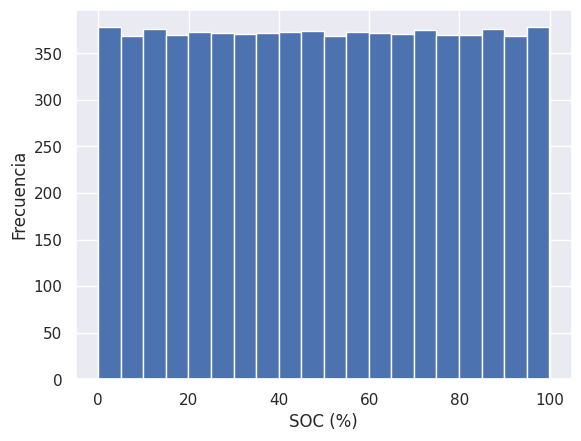

In [ ]:
plt.hist(df["SOC"], bins="auto")
plt.xlabel("SOC (%)")
plt.ylabel("Frecuencia")
plt.show()

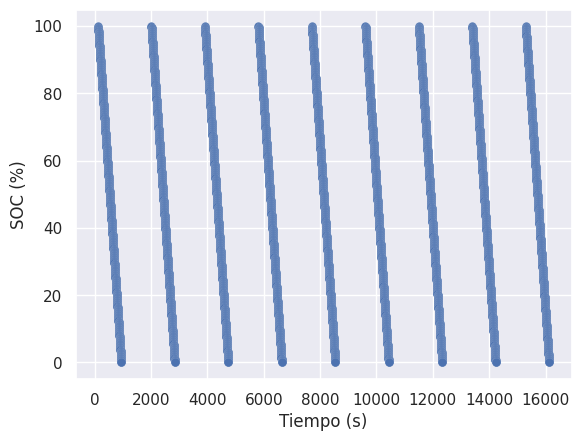

In [ ]:
sns.scatterplot(x=df.index, y=df["SOC"], linewidth=0.05)
plt.xlabel("Tiempo (s)")
plt.ylabel("SOC (%)")
plt.show()

##Matriz de correlación
Después de analizar pormenorizadamente cada variable por separado, procedemos a analizar la correlación entre variables.
Las filas o columnas que no aparecen en la matriz se debe a que su valor es constante.

<Axes: >

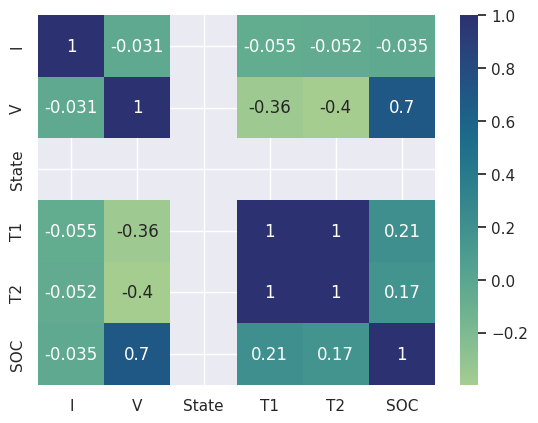

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="crest")

##Análisis bivariado
Analizaremos en gráficas las correlaciones encontradas en la matriz anterior.

###Estado de carga frente a tensión

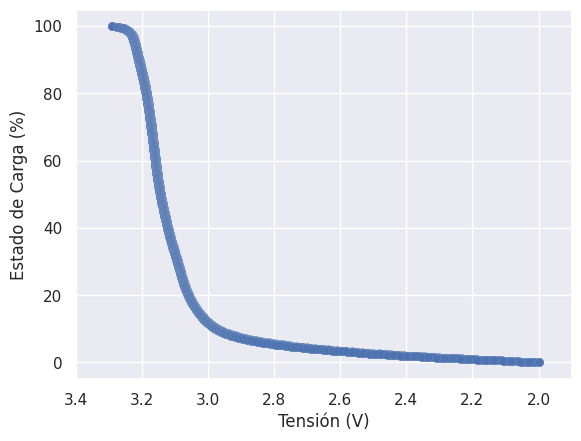

In [ ]:
sns.scatterplot(x=df["V"], y=df["SOC"], linewidth=0.05)
plt.xlabel("Tensión (V)")
plt.ylabel("Estado de Carga (%)")
plt.xlim(3.4, 1.9)
plt.show()

###Estado de carga frente a temperatura

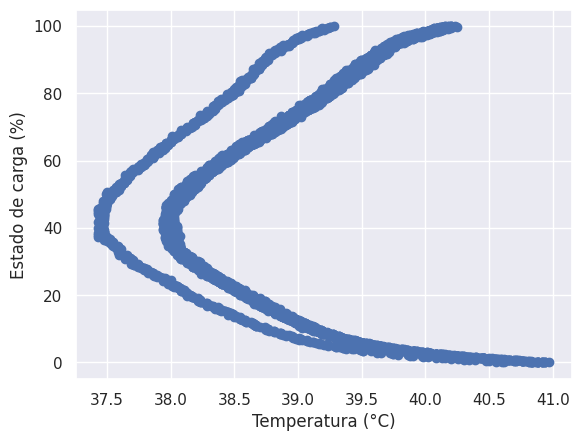

In [ ]:
plt.scatter(df["T1"], df["SOC"])
plt.xlabel("Temperatura (°C)")
plt.ylabel("Estado de carga (%)")
#plt.title("Estado de carga en función de la temperatura")
plt.show()

###Temperatura 2 frente a temperatura 1

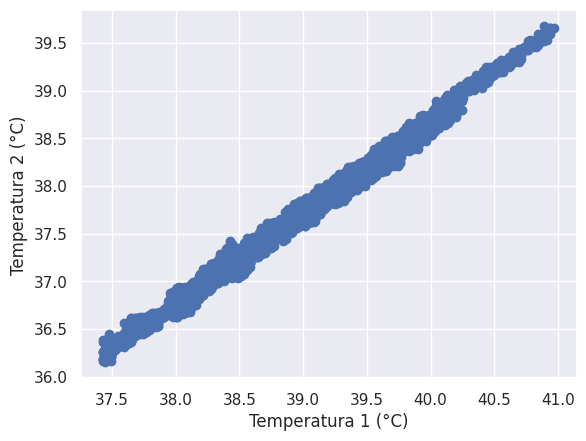

In [ ]:
plt.scatter(df["T1"], df["T2"])
plt.xlabel("Temperatura 1 (°C)")
plt.ylabel("Temperatura 2 (°C)")
#plt.title("Temperatura 2 en función de la temperatura 1")
plt.show()